In [2]:
%run ../draw_functions.py
%run ../kstest.py

In [3]:
from draw_functions import *
from kstest import *

In [4]:
#read csv
df = pd.read_csv('../csv/TMA2.csv')

#ajout du slope
df['slope'] = df.groupby('ResultCurve_id').apply(lambda group: group['xvalue'].diff() / group['xtime'].diff(), include_groups=False).reset_index(level=0, drop=True)
df_02_08 = df[(df['xtime'] >= 0.2) & (df['xtime'] <= 0.8)]
df

,ResultCurve_id,xtime,xvalue,Batch,Sample_Code,slope
0,D6569D6D-C651-41F5-A555-01E4C140C459,0.020000,1.288029,001001C,N6P0BR10M,NaN
1,D6569D6D-C651-41F5-A555-01E4C140C459,0.030000,1.299328,001001C,N6P0BR10M,1.129850
2,D6569D6D-C651-41F5-A555-01E4C140C459,0.040000,1.310626,001001C,N6P0BR10M,1.129850
3,D6569D6D-C651-41F5-A555-01E4C140C459,0.050000,1.310626,001001C,N6P0BR10M,0.000000
4,D6569D6D-C651-41F5-A555-01E4C140C459,0.060000,1.310626,001001C,N6P0BR10M,0.000000
...,...,...,...,...,...,...
2462,AF25CE53-8266-45BA-B0EE-D055045B1746,1.358333,4.214341,002202C,N6P0BR6KO,0.420739
2463,AF25CE53-8266-45BA-B0EE-D055045B1746,1.368333,4.236938,002202C,N6P0BR6KO,2.259700
2464,AF25CE53-8266-45BA-B0EE-D055045B1746,1.378333,4.225639,002202C,N6P0BR6KO,-1.129850
2465,AF25CE53-8266-45BA-B0EE-D055045B1746,1.388333,4.248236,002202C,N6P0BR6KO,2.259700


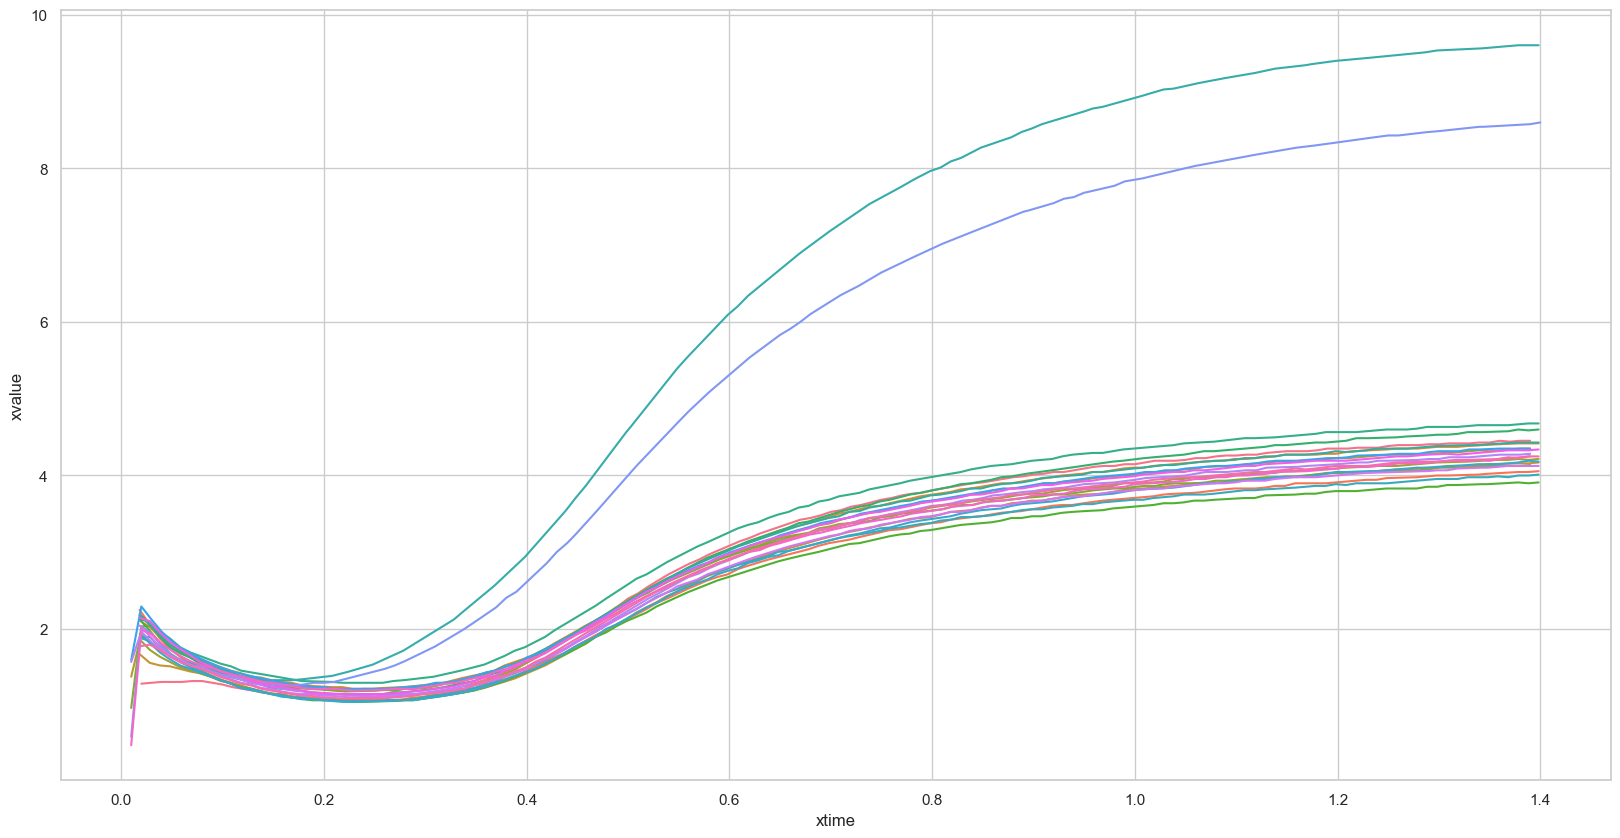

In [5]:
dessiner_commande(df)

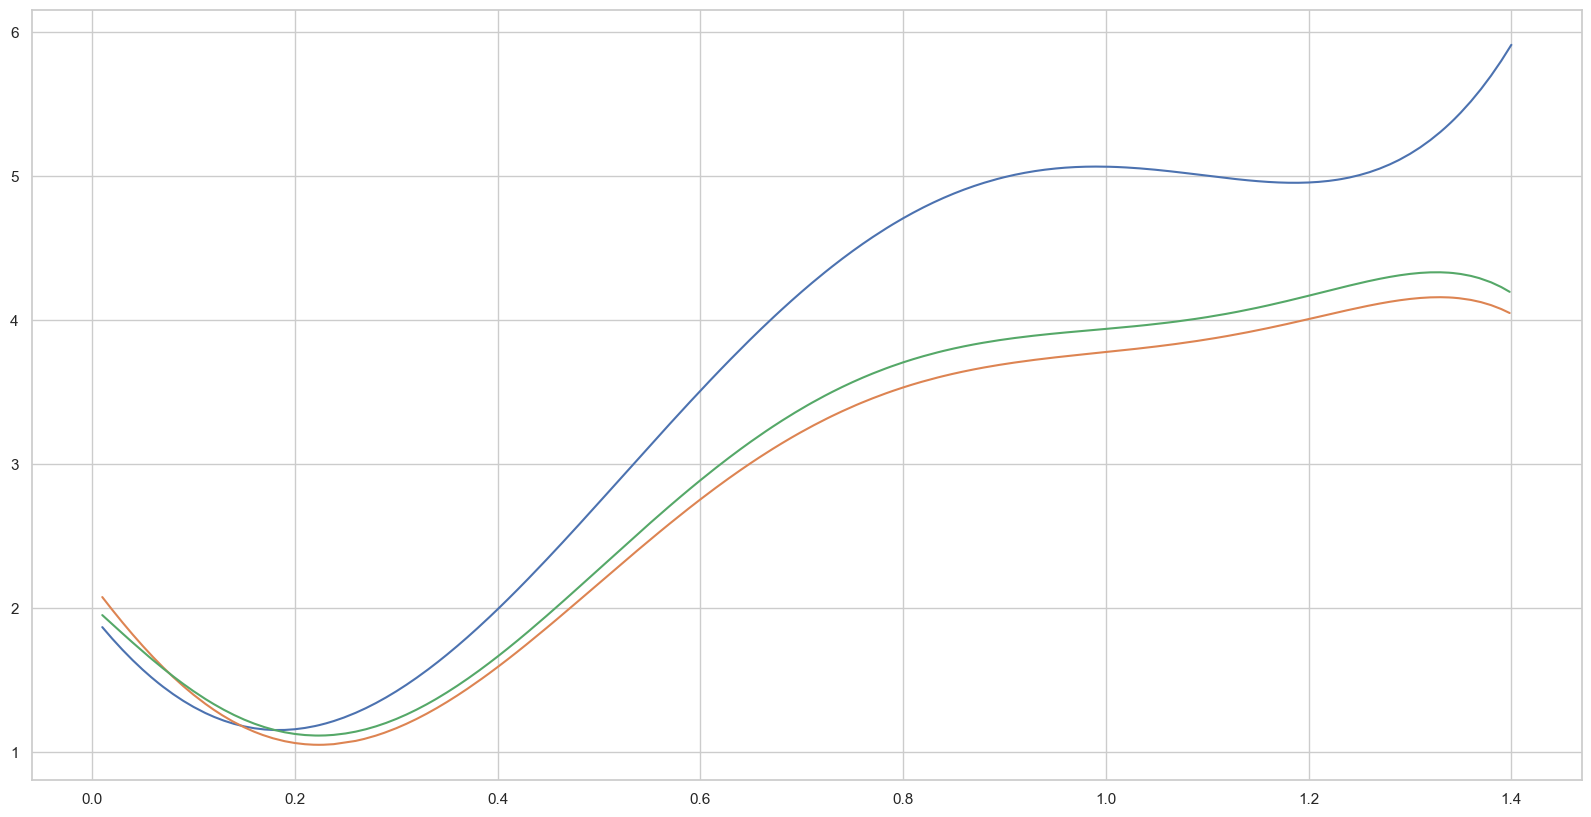

In [6]:
dessiner_commande(df,degree=6)

## Analyse des pentes

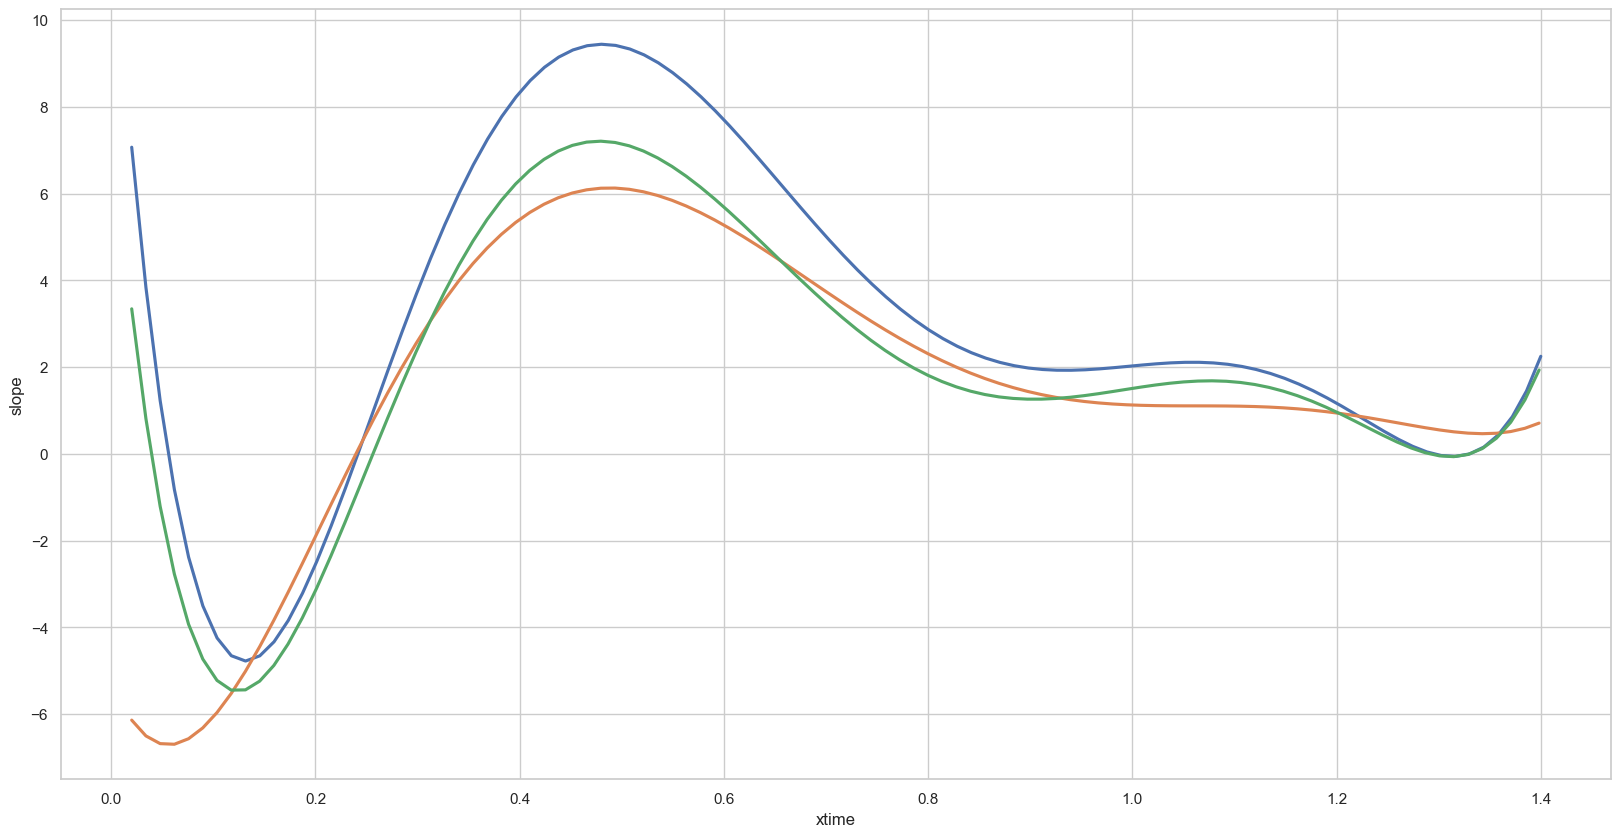

In [7]:
dessiner_commande_slope(df, 6 ,unified=True)

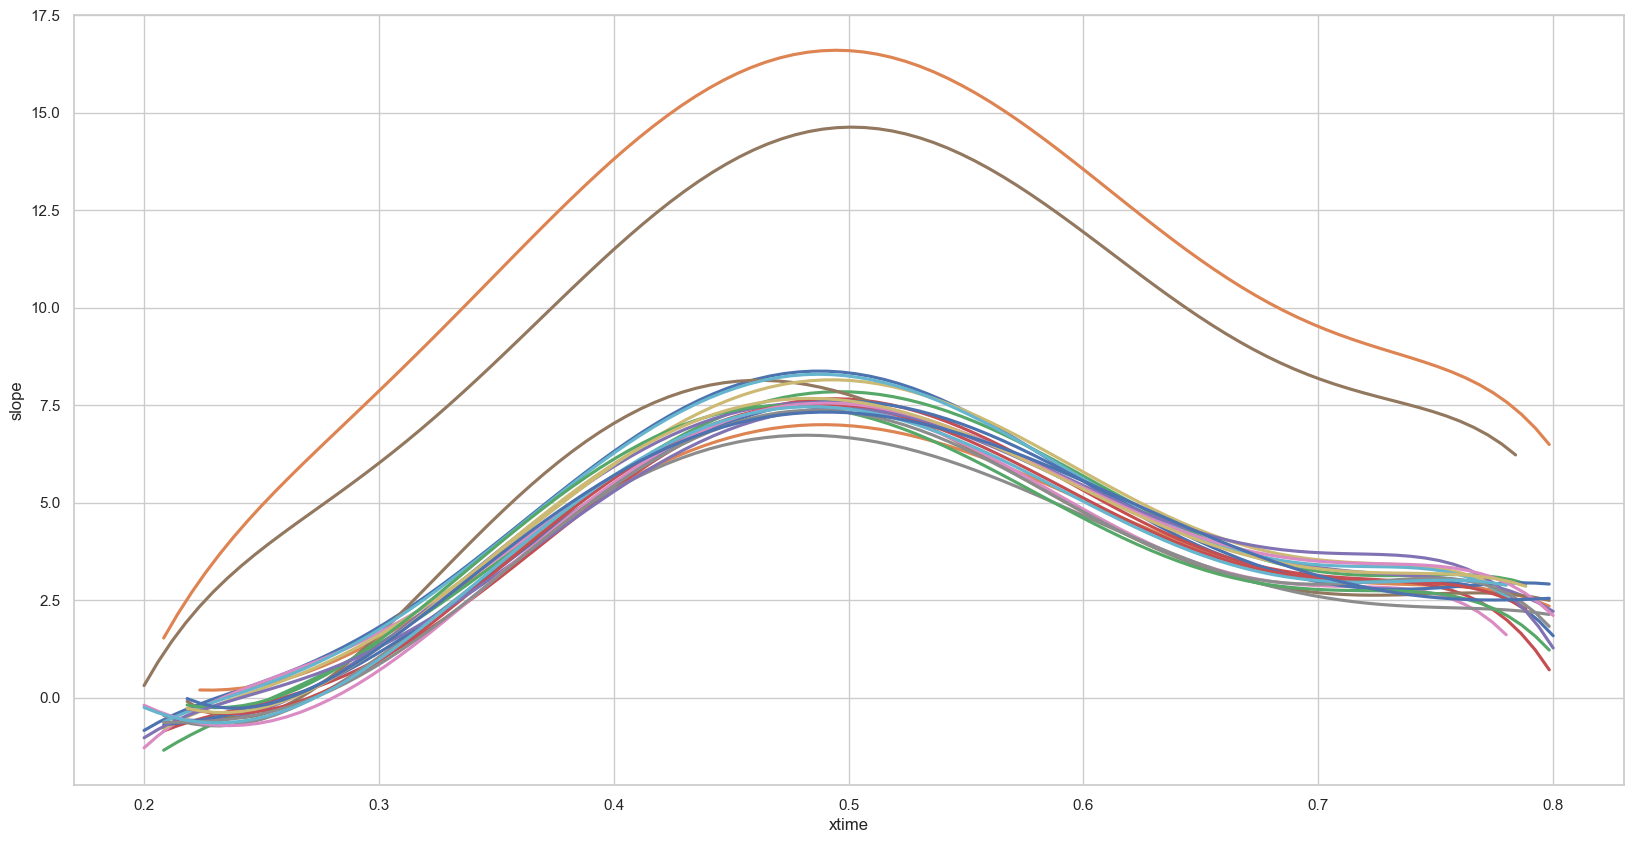

In [5]:
dessiner_commande_slope(df_02_08, 6 ,unified=False)

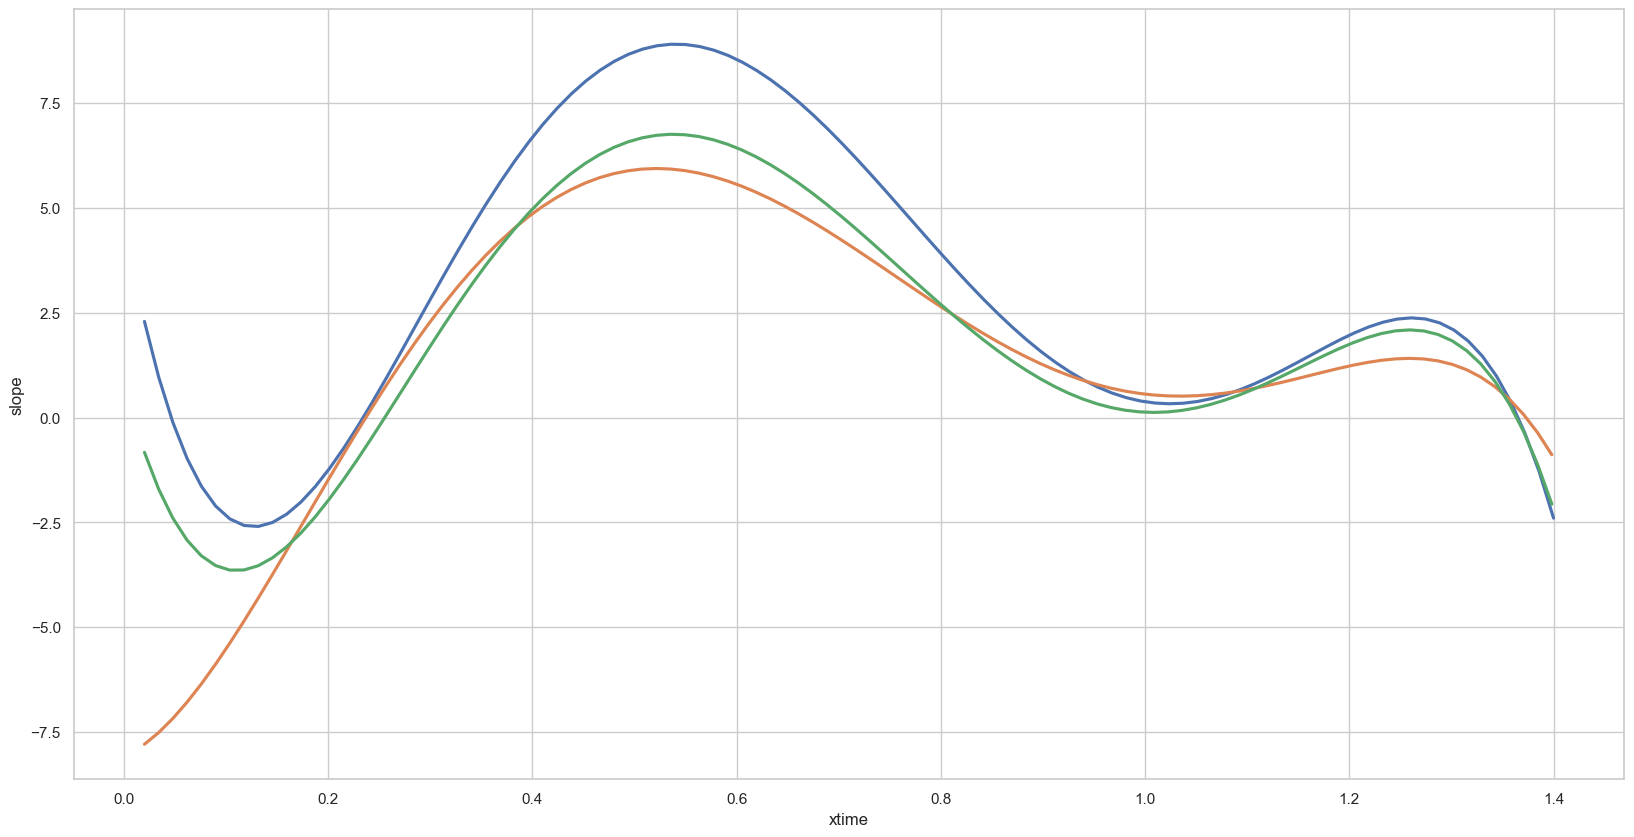

In [9]:
dessiner_commande_slope(df, 5 ,unified=True)

- Batch 001001C: 38.10919750565954
- Batch 003303C: 30.365699827541278
- Batch 002202C: 30.365266369006235


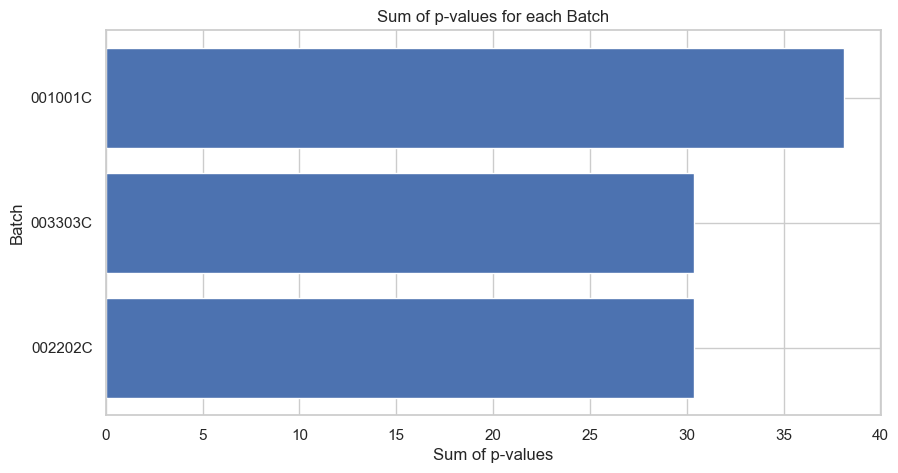

In [17]:
batch_pvalues = ks_test_slope(df, 6)

visualiser_pvalue(batch_pvalues, log=True)

- Batch 001001C: 165.20786232396094
- Batch 002202C: 14.824252284139156
- Batch 003303C: 14.824252284139156


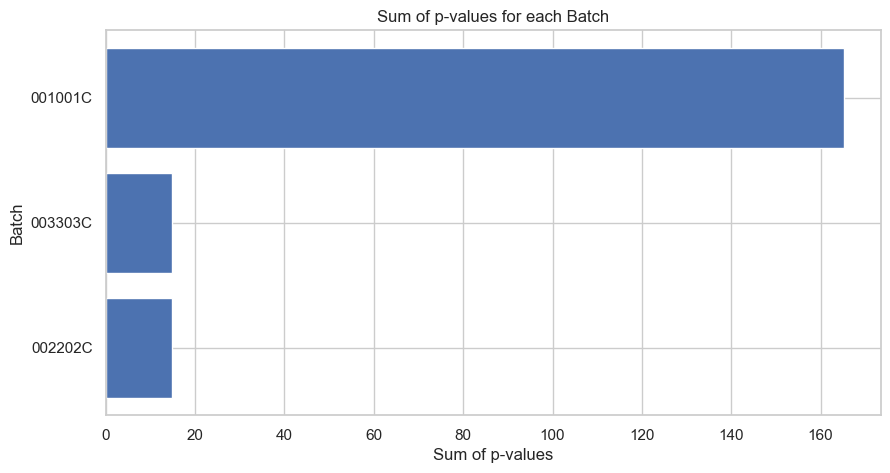

In [11]:
batch_pvalues = ks_test_value(df, 6)

visualiser_pvalue(batch_pvalues, log=True)

In [14]:
# Trouver le xtime correspondant au max de la pente pour chaque groupe
max_slope_xtime = df_02_08.loc[df_02_08.groupby('Batch')['slope'].idxmax()]['xtime']

# Calculer la différence entre le max et le min des xtime
max_diff = max_slope_xtime.max() - max_slope_xtime.min()

print("La plus grande différence des xtime entre les max des pentes des différentes batch est :", round(max_diff*60,3), "secondes")

La plus grande différence des xtime entre les max des pentes des différentes batch est : 1.8 secondes


In [7]:
# Trouver le xtime correspondant au max de la pente pour chaque groupe
max_slope_sample_xtime = df_02_08.loc[df_02_08.groupby('Sample_Code')['slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']
max_slope_batch_xtime = max_slope_sample_xtime.groupby('Batch').median()

# Calculer la médiane de xtime pour chaque groupe
median_xtime = max_slope_sample_xtime.median()

# Calculer la différence entre le xtime du max de la pente et la médiane de xtime pour chaque groupe
diff = max_slope_batch_xtime - median_xtime

# Sort the differences by their absolute values in descending order
diff_sorted = diff.abs().sort_values(ascending=False)

# Print the differences in the sorted order
for batch in diff_sorted.index:
    print(f"La différence de temps entre le max de la pente et la médiane pour le batch {batch} est : {round(diff_sorted[batch]*60,3)} seconde")

La différence de temps entre le max de la pente et la médiane pour le batch 002202C est : 1.2 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 003303C est : 0.9 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 001001C est : 0.22 seconde


In [11]:
round(np.std(max_slope_sample_xtime)*1000,2)

21.02

In [12]:
round(np.std(max_slope_batch_xtime)*1000,2)

10.18